In [ ]:
## Problem Statement:To Predit whether the Income of Individual is greater than or less than equal to 50000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/census-income_ (2).csv",skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.rename(columns={"Unnamed: 14":"Income"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
for x in df.columns:
  print(df[x].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [ ]:
df=df.replace("?",np.nan)

In [ ]:
for x in df.columns:
  print(df[x].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

23

In [ ]:
df.drop_duplicates(inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


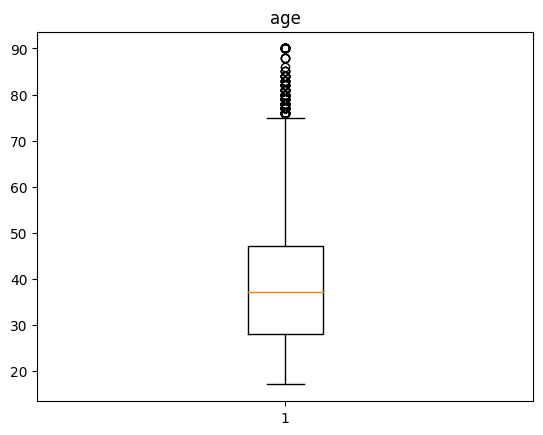

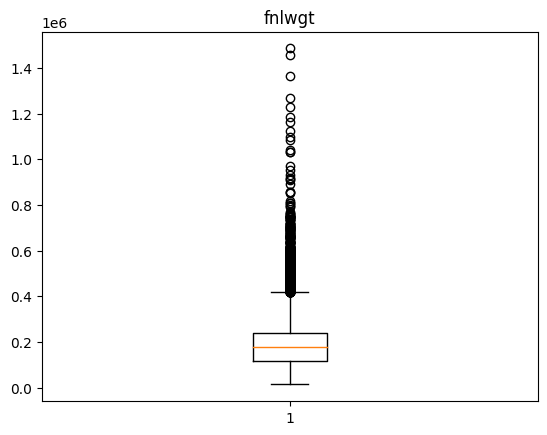

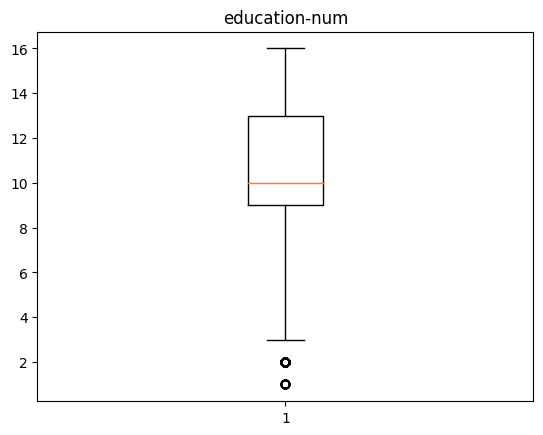

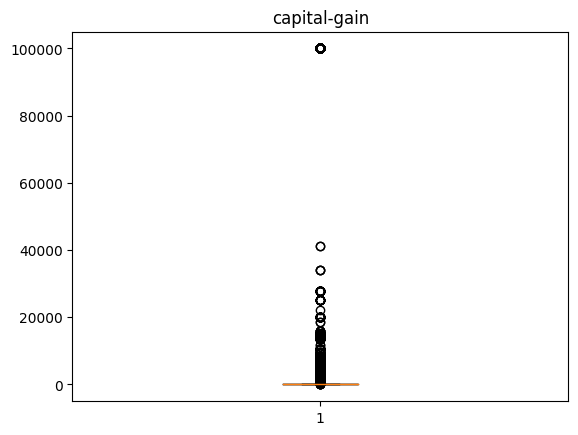

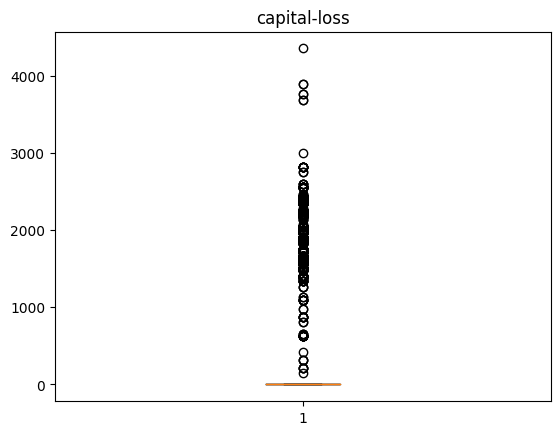

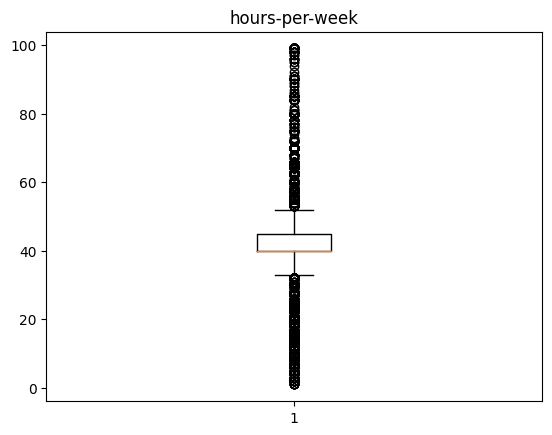

In [ ]:
for x in df.columns:                                  # outlier Analysis
  if df[x].dtype!="object":
    plt.boxplot(df[x])
    plt.title(x)
    plt.show()

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [ ]:
out_cols=['age','fnlwgt', 'education-num']

In [ ]:
for col in out_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[col]>=LL)&(df[col]<=UL)]

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder           ## label encoding

In [ ]:
le=LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype=="object":
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,8,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,10,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
df.corr(numeric_only=True)                               # correlation for feature slection

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
age,1.000000,0.078913,-0.064546,0.008383,0.058597,-0.297556,-0.004208,-0.250358,0.025414,0.087754,0.082261,0.059199,0.127415,-0.004526,0.254411
workclass,0.078913,1.000000,-0.031223,0.017750,0.038901,-0.034638,0.013917,-0.068361,0.043667,0.076265,0.034217,0.007003,0.054154,0.006252,0.017337
fnlwgt,-0.064546,-0.031223,1.000000,-0.018879,-0.028265,0.032675,-0.000111,0.006684,-0.012280,0.019634,0.000551,-0.002398,-0.024053,-0.058493,-0.002824
education,0.008383,0.017750,-0.018879,1.000000,0.337865,-0.039726,-0.038554,-0.016493,0.012159,-0.023482,0.028826,0.014788,0.061545,0.067473,0.076847
education-num,0.058597,0.038901,-0.028265,0.337865,1.000000,-0.056067,0.090996,-0.097263,0.032143,0.009558,0.125119,0.081318,0.152252,0.049127,0.336455
marital-status,-0.297556,-0.034638,0.032675,-0.039726,-0.056067,1.000000,0.021878,0.177378,-0.068743,-0.119519,-0.042553,-0.036327,-0.188338,-0.020748,-0.192293
occupation,-0.004208,0.013917,-0.000111,-0.038554,0.090996,0.021878,1.000000,-0.054840,0.001845,0.063221,0.021202,0.015373,0.019121,-0.004294,0.052120
relationship,-0.250358,-0.068361,0.006684,-0.016493,-0.097263,0.177378,-0.054840,1.000000,-0.115029,-0.587202,-0.057786,-0.063025,-0.264457,-0.011810,-0.252435
race,0.025414,0.043667,-0.012280,0.012159,0.032143,-0.068743,0.001845,-0.115029,1.000000,0.088737,0.012894,0.023798,0.050106,0.136478,0.070970
sex,0.087754,0.076265,0.019634,-0.023482,0.009558,-0.119519,0.063221,-0.587202,0.088737,1.000000,0.048266,0.047967,0.234132,0.002592,0.219068


<Axes: >

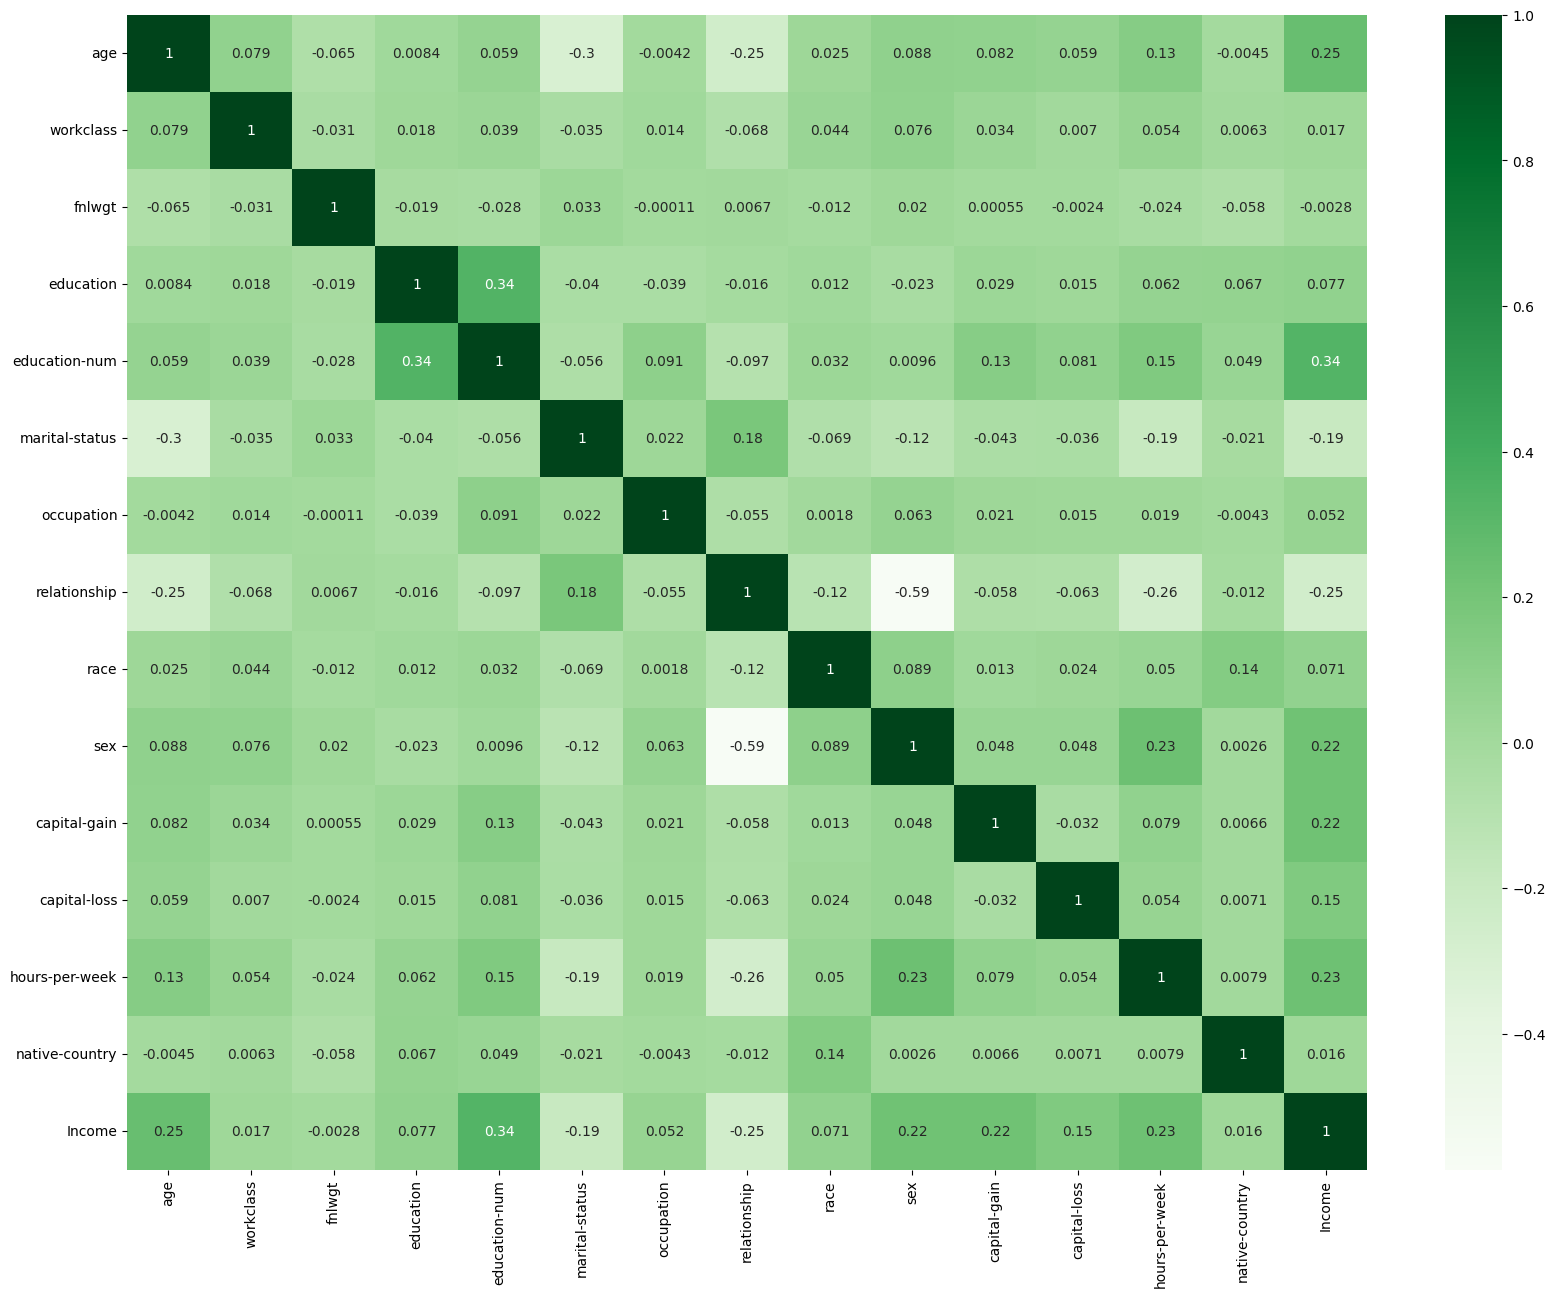

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),cmap="Greens",annot=True)


In [ ]:
from sklearn.feature_selection import RFE                 # RFE--Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

In [ ]:
rfe=RFE(LogisticRegression())

In [ ]:
X=df.iloc[:,:-1]                                          # spliting the data into dependent and independent
Y=df["Income"]

In [ ]:
rfe.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression())

In [ ]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
rfe.ranking_                   ## to give rankings to columns in X acc. to their imp for model

array([1, 1, 8, 3, 1, 1, 5, 1, 1, 1, 7, 6, 4, 2])

In [ ]:
selected_features=X.columns[rfe.get_support(indices=False)]    ## gives imp columns for model
selected_features

Index(['age', 'workclass', 'education-num', 'marital-status', 'relationship',
       'race', 'sex'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=32)    # splitting of data into training and test

In [ ]:
x_train=rfe.transform(x_train)
x_test=rfe.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression                   # model Implementation

In [ ]:
Lo_model=LogisticRegression()

In [ ]:
Lo_model.fit(x_train,y_train)                                         # model training

LogisticRegression()

In [ ]:
lo_pred=Lo_model.predict(x_test)                                       # model prediction

In [ ]:
lo_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,lo_pred)

0.7991004497751124

In [ ]:
cm=confusion_matrix(y_test,lo_pred)

<Axes: >

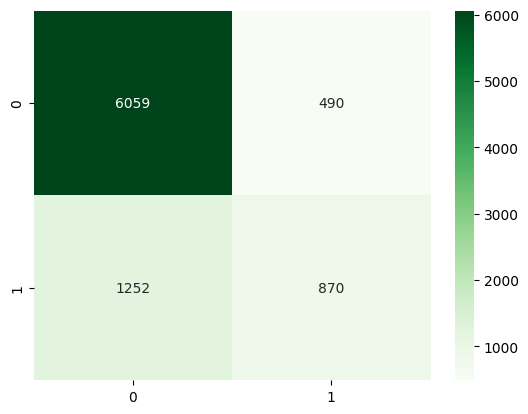

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,lo_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      6549
           1       0.64      0.41      0.50      2122

    accuracy                           0.80      8671
   macro avg       0.73      0.67      0.69      8671
weighted avg       0.78      0.80      0.78      8671



In [ ]:
from sklearn.model_selection import cross_val_score        # Performing cross validation

In [ ]:
Lg=LogisticRegression()

In [ ]:
cross=cross_val_score(Lg,X[selected_features],Y,cv=5,scoring="accuracy")

In [ ]:
cross

array([0.79017471, 0.79359862, 0.80346021, 0.8       , 0.79653979])